# Bases ortonormales
## Explicacion Matematica
### Explicación

Una base ortonormal es, en escencia, un sistema de referencia hecho de vectores unitarios mutuamente perpendiculares. En el espacio $\mathbb{R^3}$, un ejemplo de base ortornoaml estándar es

$$
{e_1, e_2, e_3} = {(1,0,0), (0,1,0), (0,0,1)}
$$

Aquí:

* Cada vector tiene normal $\|e_1\| = \|e_2\| = \|e_3\| = 1$
* Son ortogonales entre sí: $\langle e_i,e_j\rangle = 0$ para $i \neq j$

Geometricamente, esto significa que cada vector apunta en una dirección completamente independiente de los otros, formando un ángulo recto. El concepto se generaliza a cualquier dimensión.

### Explicación formal

Sea $V$ un espacio vectorial de dimensión finita $n$ sobre $\mathbb{R}$, con producto interno $\langle *,* \rangle$. Un conjunto de vectores ${v_1,v_2,...,v_n}$ es una base ortornoaml si satisface

1- Ortonormalidad:

$$
\langle v_i, v_j \rangle =
\begin{cases}
1 & \text{si } i = j \\
0 & \text{si } i \neq j
\end{cases}
$$

Esto significa que cada vector tiene norma 1 (normalidad) y son  ortogonales entre sí (ortogonalidad)

2- Base:

El conjunto es base si cualquier vector $v \in$ se puede escribir como combinación lineal

$$
v = c_1v_1 + c_2v_2 + \dots + c_nv_n
$$

Si el espacio tiene producto interno, los coeficientes son fáciles de calcular 

$$
c_i = \langle v, v_i \rangle
$$

Esto simplifica muchas operaciones, lo cual es una ventaja de trabajar con bases ortonormales.



## Aplicaciones en Ciencias de datos

# Ejemplo practico: PCA (Análisis de Componentes Principales)

## Objetivo
Reducir la dimensión de un conjunto de datos, manteniendo la mayor cantidad posible de información.

1. **Centralizar los datos**  
   Restamos la media de cada característica para que los datos estén centrados en el origen.

2. **Calcular la matriz de covarianza**  
   Esta matriz mide cómo varían las características entre sí.

   Ejemplo: Si las características son altura y peso, la covarianza mide si al aumentar la altura, también suele aumentar el peso.

3. **Descomposición espectral**  
   Se calculan los **autovectores y autovalores** de la matriz de covarianza. Estos autovectores forman una **base ortonormal**.

4. **Ordenar por importancia**  
   Los autovalores indican cuánta información (varianza) explica cada autovector. Los autovectores con autovalores más grandes son las direcciones principales (componentes principales).

5. **Cambio de base**  
   Proyectamos los datos originales sobre esta base ortonormal de componentes principales. Esto transforma el dataset original a un nuevo espacio donde las coordenadas son independientes entre sí (descorreladas).

6. **Reducción**  
   Si solo queremos las 2 o 3 direcciones principales, nos quedamos con los primeros vectores de la base ortonormal y descartamos el resto.

## Ejemplo simple
Si los datos originales son puntos en 3D:

$$
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix}
$$

Después de PCA, los datos podrían vivir en 2D:

$$
y = 
\begin{bmatrix}
y_1 \\
y_2
\end{bmatrix}
$$

---

# Ejemplo practico: Normalización de embeddings en NLP

## Objetivo
Al trabajar con vectores de palabras (word embeddings) o embeddings de documentos, muchas veces se normalizan para tener norma 1. Esto es útil para usar métricas como el **coseno** para medir similitud.

1. **Obtener embeddings**  
   El modelo convierte cada palabra en un vector:

$$
w_i =
\begin{bmatrix}
w_{i1} \\
w_{i2} \\
\vdots \\
w_{i300}
\end{bmatrix}
$$

2. **Normalización**  
   Cada vector se divide por su norma:

$$
w_i^{(norm)} = \frac{w_i}{\|w_i\|}
$$

   Después de esto, cada vector tiene norma 1.

3. **Espacio esférico**  
   Después de normalizar, todos los vectores viven sobre la superficie de una hiperesfera unidad. Este espacio es equivalente a trabajar en una base ortonormal estándar, ya que:

- Cada vector normalizado tiene norma 1.
- El coseno es una proyección en una base ortonormal esférica.

4. **Medir similitud**  
   Ahora, la similitud entre dos palabras se mide directamente con:

$$
\cos \theta = \langle w_i^{(norm)}, w_j^{(norm)} \rangle
$$

   Como los vectores están normalizados, este producto interno es exactamente el coseno del ángulo entre los vectores.

## Ejemplo simple
Palabra "perro":

$$
w_{perro} = [0.3, 0.4, 0.5]
$$

$$
\|w_{perro}\| = \sqrt{0.3^2 + 0.4^2 + 0.5^2} = \sqrt{0.5} = 0.707
$$

$$
w_{perro}^{(norm)} = \frac{1}{0.707} \cdot [0.3, 0.4, 0.5]
$$

Así garantizas que cada vector vive en la misma esfera.


# Codigo

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Generar datos artificiales (simulación de un dataset 2D)
np.random.seed(42)
x = np.random.normal(0, 1, 100)
y = 2 * x + np.random.normal(0, 0.2, 100)

data = np.column_stack((x, y))

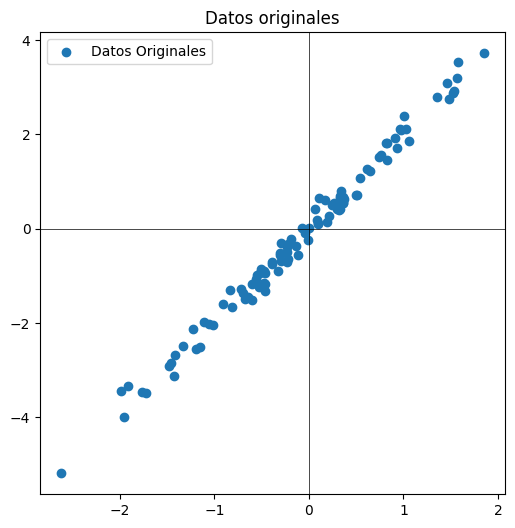

In [10]:
# Visualizar datos originales
plt.figure(figsize=(6, 6))
plt.scatter(data[:, 0], data[:, 1], label="Datos Originales")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.title("Datos originales")
plt.show()


In [11]:
# Centrar los datos (restar la media)
mean = np.mean(data, axis=0)
data_centrado = data - mean

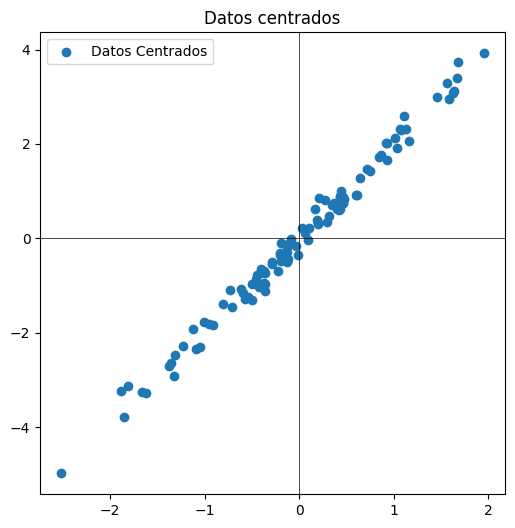

In [12]:
# Visualizar datos centrados
plt.figure(figsize=(6, 6))
plt.scatter(data_centrado[:, 0], data_centrado[:, 1], label="Datos Centrados")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.title("Datos centrados")
plt.show()

In [13]:
# Calcular matriz de covarianza
cov_matrix = np.cov(data_centrado.T)

# alcular autovalores y autovectores
autovalores, autovectores = np.linalg.eig(cov_matrix)

# Mostrar autovectores y autovalores
print("Autovalores:")
print(autovalores)
print("\nAutovectores (Base Ortonormal):")
print(autovectores)

Autovalores:
[0.00725553 4.05844996]

Autovectores (Base Ortonormal):
[[-0.8934227  -0.44921697]
 [ 0.44921697 -0.8934227 ]]


In [14]:
# Proyectar datos sobre la nueva base ortonormal
data_pca = np.dot(data_centrado, autovectores)

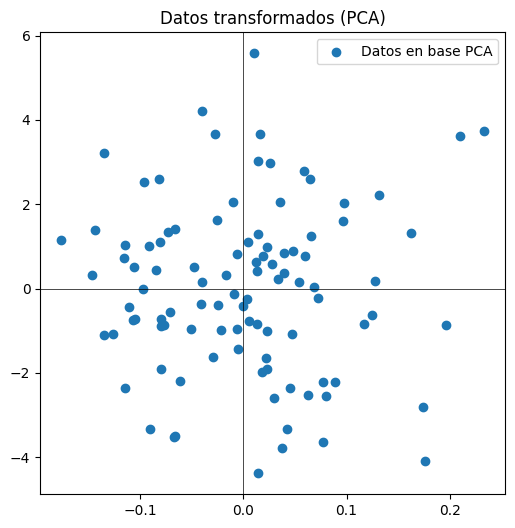

In [15]:
# Visualizar datos proyectados (en la base PCA)
plt.figure(figsize=(6, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], label="Datos en base PCA")
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.title("Datos transformados (PCA)")
plt.show()

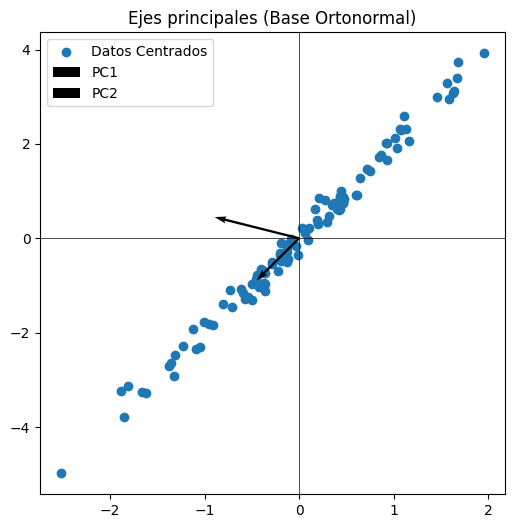

In [16]:
# Visualizar ejes de PCA sobre los datos originales centrados
plt.figure(figsize=(6, 6))
plt.scatter(data_centrado[:, 0], data_centrado[:, 1], label="Datos Centrados")
for i in range(2):
    vector = autovectores[:, i]
    plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, width=0.005, label=f"PC{i+1}")

plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.legend()
plt.title("Ejes principales (Base Ortonormal)")
plt.show()


# Enlaces

https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/

http://tutorial.math.lamar.edu/Classes/LinAlg/OrthonormalBases.aspx

https://www.math.utah.edu/~zwick/Classes/Fall2012_2270/Lectures/Lecture18.pdf

https://cs229.stanford.edu/notes2020spring/cs229-notes10.pdf

https://www.tensorflow.org/text/guide/word_embeddings
